In [77]:
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
table1=pd.read_csv(r"C:\Users\Big data\Desktop\projectdata\projectData\bigTable_much.csv")

In [3]:
table1.corr()

,state_code,house_unitPrice,lease_unitPrice,cloth_done,convStore_done,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,restaurant_statcode,ubike,center_lat,center_lon
state_code,1.000000,-0.018056,-0.062047,-0.029506,-0.007637,-0.004756,-0.013164,-0.024437,0.000537,-0.009121,-0.022141,-0.034790,-0.013493,-0.027692,-0.008870,1.000000,0.510115
house_unitPrice,-0.018056,1.000000,0.318601,0.216357,0.338375,0.157127,0.107969,0.322956,0.260558,0.250120,0.105907,0.298661,0.117245,0.439131,0.115356,-0.018070,0.031395
lease_unitPrice,-0.062047,0.318601,1.000000,0.176767,0.304143,0.096727,0.112436,0.194958,0.183465,0.205762,0.071827,0.183256,0.092450,0.332916,0.083455,-0.062067,-0.008019
cloth_done,-0.029506,0.216357,0.176767,1.000000,0.430714,0.146492,0.300352,0.335326,0.323663,0.178994,0.078625,0.255765,0.061238,0.589265,0.050008,-0.029527,-0.019567
convStore_done,-0.007637,0.338375,0.304143,0.430714,1.000000,0.269523,0.376466,0.417010,0.512617,0.322911,0.114092,0.388880,0.127748,0.716309,0.153045,-0.007662,0.015784
edu_all_statecode,-0.004756,0.157127,0.096727,0.146492,0.269523,1.000000,0.111345,0.194318,0.246517,0.176330,0.092058,0.153554,-0.002217,0.245326,0.061465,-0.004774,0.012243
hardware_done,-0.013164,0.107969,0.112436,0.300352,0.376466,0.111345,1.000000,0.235526,0.336143,0.085743,0.076642,0.207685,0.066440,0.399534,0.068826,-0.013183,-0.011662
hsp_and_clc,-0.024437,0.322956,0.194958,0.335326,0.417010,0.194318,0.235526,1.000000,0.327524,0.281071,0.206955,0.351434,0.051798,0.551706,0.133099,-0.024456,0.008420
illegal_don,0.000537,0.260558,0.183465,0.323663,0.512617,0.246517,0.336143,0.327524,1.000000,0.163409,0.174608,0.201582,0.100068,0.474996,0.092521,0.000515,-0.011417
job_stat_code,-0.009121,0.250120,0.205762,0.178994,0.322911,0.176330,0.085743,0.281071,0.163409,1.000000,0.035644,0.210241,0.028945,0.358356,0.050277,-0.009136,0.062330


In [4]:
table=table1.drop(["center","dist","vil","state_code","center_lat","center_lon"],axis=1)

In [6]:
table["house_unitPrice"]=preprocessing.scale(table["house_unitPrice"])
table["lease_unitPrice"]=preprocessing.scale(table["lease_unitPrice"])
#table["center_lat"]=preprocessing.scale(table["center_lat"])
#table["center_lon"]=preprocessing.scale(table["center_lon"])

In [7]:
silhouette= []
k=range(2,40)
for i in k:
    kmeans = cluster.KMeans(n_clusters = i).fit(table)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(table,cluster_labels)
    silhouette.append(silhouette_avg)
    

In [8]:
silhouette

[0.788716590981649,
 0.7599922371713478,
 0.734553129474849,
 0.6529840333040082,
 0.6660402067559381,
 0.6438084536322264,
 0.6206422119515383,
 0.6216563966008339,
 0.6206418290957261,
 0.6059789359221134,
 0.6320777785403205,
 0.6141993106851071,
 0.5614024950272999,
 0.5563376636569389,
 0.561789771433839,
 0.5317827203403954,
 0.5698385019398273,
 0.5413867259083727,
 0.5641978545811112,
 0.5268074489723077,
 0.5307184608692185,
 0.4763402953654143,
 0.5391804970682574,
 0.5066836024962778,
 0.47218443439743685,
 0.5040230612640695,
 0.5272171538299275,
 0.504405540638854,
 0.5032212074081324,
 0.4913950651943922,
 0.5154218817677534,
 0.43182677653921214,
 0.489609544561913,
 0.4597282260504524,
 0.4657404459189522,
 0.4348033583037601,
 0.4573281635148197,
 0.4346052622175939]

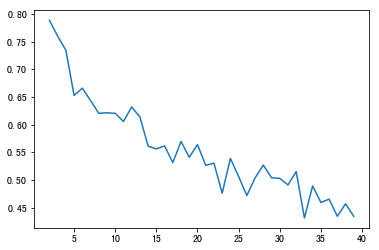

In [9]:
plt.plot(k,silhouette)

In [10]:
kmeans = cluster.KMeans(n_clusters = 3).fit(table)
cluster_labels = kmeans.labels_

In [11]:
cluster_result=list(cluster_labels)
  

In [12]:
table1["cluster_labels"]=cluster_labels

In [13]:
table1[table1["cluster_labels"]==2].head()

,state_code,house_unitPrice,lease_unitPrice,cloth_done,convStore_done,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,...,night_club,park,restaurant_statcode,ubike,center,center_lat,center_lon,dist,vil,cluster_labels
53,552626784,442500.0,921.0,2.0,1.0,2.0,0.0,0.0,4.0,0.0,...,0.0,0.0,71.0,0.0,"(24.99005191093747, 121.53926485947247)",24.990052,121.539265,文山區,景美里,2
163,553226873,670500.0,1435.0,2.0,1.0,0.0,1.0,0.0,8.0,1.0,...,0.0,0.0,86.0,0.0,"(25.017183062926186, 121.51425618573887)",25.017183,121.514256,永和區,頂溪里,2
197,553326890,509000.0,1280.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,67.0,0.0,"(25.02170492159097, 121.52858053330358)",25.021705,121.528581,大安區,古風里,2
200,553326893,569000.0,1300.0,2.0,1.0,4.0,0.0,1.0,7.0,13.0,...,0.0,0.0,90.0,0.0,"(25.02170492159097, 121.54213869479555)",25.021705,121.542139,大安區,龍淵里,2
201,553326894,602000.0,1500.0,3.0,2.0,0.0,1.0,0.0,5.0,0.0,...,0.0,0.0,74.0,0.0,"(25.02170492159097, 121.54665808195955)",25.021705,121.546658,大安區,臥龍里,2


Text(0.5,1,'测试中文')

c:\users\big data\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


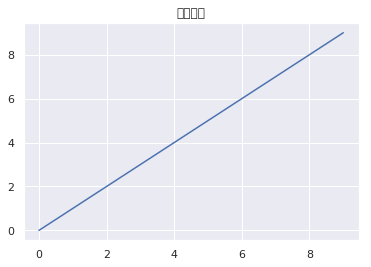

In [18]:
from matplotlib.font_manager import FontProperties


#指定字體 windows的字體庫在下面所示路徑，裏面有很多字體庫

#也可以在網上下載ttf字體文檔，自己指定路徑
myfont=FontProperties(fname=r'C:\Users\Big data\Documents\R\win-library\3.4\shiny\www\shared\font-awesome\fonts\simhei.ttf',size=8)
sns.set(font=myfont.get_name())
plt.plot(range(10))
plt.title('测试中文')

In [14]:
tablecluster0=table1[table1["cluster_labels"]==0]

In [15]:
tablecluster1=table1[table1["cluster_labels"]==1]

In [16]:
tablecluster2=table1[table1["cluster_labels"]==2]

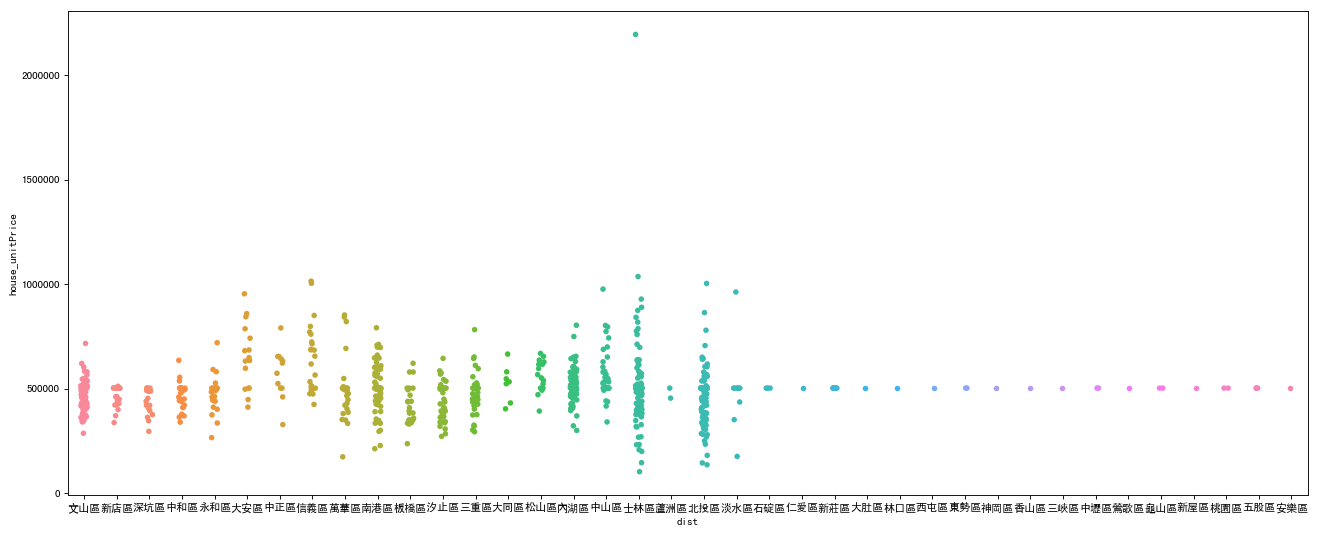

In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
sns.stripplot(x="dist",y="house_unitPrice",data=tablecluster0,jitter=True,)


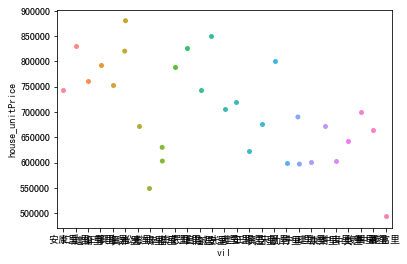

In [20]:
sns.stripplot(x="vil",y="house_unitPrice",data=tablecluster1,jitter=True)

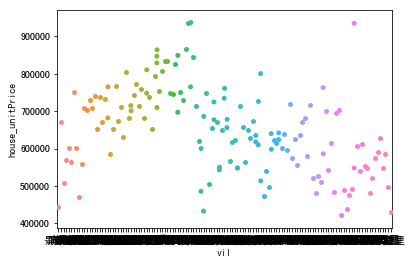

In [21]:
sns.stripplot(x="vil",y="house_unitPrice",data=tablecluster2)

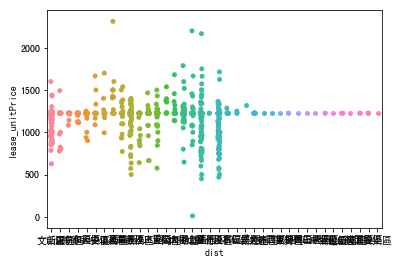

In [19]:
sns.stripplot(x="dist",y="lease_unitPrice",data=tablecluster0)

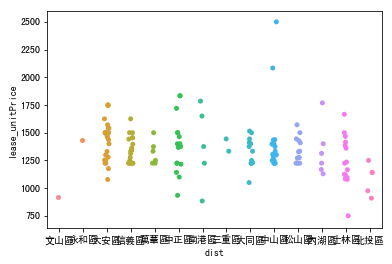

In [20]:
sns.stripplot(x="dist",y="lease_unitPrice",data=tablecluster1)

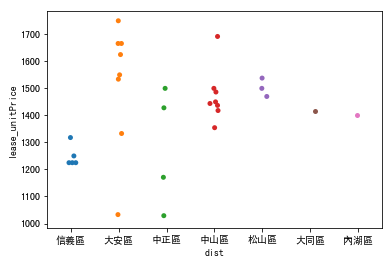

In [23]:
sns.stripplot(x="dist",y="lease_unitPrice",data=tablecluster2)

# K-mean

In [78]:
table=pd.read_csv(r"C:\Users\Big data\Desktop\bigTable_range_col-master\bigTable_full.csv")


In [79]:
table.head()

,state_code,house_unitPrice,lease_unitPrice,center,center_lat,center_lon,cit,dist,vil,master,...,convStore_done,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike
0,552226718,717000.0,1017.75,"(24.97196447627833, 121.57556719359505)",24.971964,121.575567,台北市,文山區,老泉里,0.021583,...,13,40,4,2,12,0,0,1,1,1
1,552426755,517000.0,1017.75,"(24.981008193607902, 121.57059498487678)",24.981008,121.570595,台北市,文山區,老泉里,0.021583,...,28,46,9,3,29,1,3,1,2,2
2,552326738,341000.0,1017.75,"(24.976486334943115, 121.5786568323529)",24.976486,121.578657,台北市,文山區,指南里,0.139898,...,14,32,4,1,11,0,3,1,2,0
3,552326739,436000.0,1017.75,"(24.976486334943115, 121.5832037836341)",24.976486,121.583204,台北市,文山區,指南里,0.139898,...,5,25,2,0,6,0,1,1,1,0
4,552326740,406000.0,1017.75,"(24.976486334943115, 121.5877507349153)",24.976486,121.587751,台北市,文山區,指南里,0.139898,...,3,20,1,0,4,0,0,0,1,0


table3=pd.merge(table1,table2,on="state_code",how="inner")

In [80]:
cl_table=table.drop(["state_code","center","center_lat","center_lon","cit","dist","vil"],axis=1)

In [81]:
cl_table.head()

,house_unitPrice,lease_unitPrice,master,college,highSchool,secondary,median,restaurant,106_traffic_done,cloth_done,convStore_done,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike
0,717000.0,1017.75,0.021583,0.160671,0.485612,0.332134,538,1,8,6,13,40,4,2,12,0,0,1,1,1
1,517000.0,1017.75,0.021583,0.160671,0.485612,0.332134,538,61,116,18,28,46,9,3,29,1,3,1,2,2
2,341000.0,1017.75,0.139898,0.250568,0.413167,0.196368,750,4,8,6,14,32,4,1,11,0,3,1,2,0
3,436000.0,1017.75,0.139898,0.250568,0.413167,0.196368,750,3,9,0,5,25,2,0,6,0,1,1,1,0
4,406000.0,1017.75,0.139898,0.250568,0.413167,0.196368,750,7,4,0,3,20,1,0,4,0,0,0,1,0


In [82]:
train_table=preprocessing.scale(cl_table)

In [7]:
train_table[0:3]

array([[ 1.04535354, -0.7965708 , -2.11649266, -2.49338105,  1.51654352,
         2.60502684, -1.36520831, -0.71296834, -1.07862006, -0.83980528,
        -1.00128746, -0.81224555, -0.91615268, -0.97989843, -1.22998909,
        -0.55786605, -0.91920581, -0.57413842, -1.11608385, -1.29407293],
       [-0.19093725, -0.7965708 , -2.11649266, -2.49338105,  1.51654352,
         2.60502684, -1.36520831, -0.50375491, -0.38799568, -0.67605626,
        -0.7162879 , -0.63617562, -0.6033862 , -0.9508283 , -0.87799942,
        -0.54433681,  0.24579496, -0.57413842, -0.94217481, -1.03061354],
       [-1.27887315, -0.7965708 ,  0.81879658, -0.81170591, -0.67182263,
         0.50473786,  0.15489734, -0.70250767, -1.07862006, -0.83980528,
        -0.98228749, -1.04700547, -0.91615268, -1.00896855, -1.25069437,
        -0.55786605,  0.24579496, -0.57413842, -0.94217481, -1.55753232]])

In [74]:
silhouette1= []
k=range(2,10)
for i in k:
    kmeans = cluster.KMeans(n_clusters = i).fit(train_table)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(train_table,cluster_labels)
    silhouette1.append(silhouette_avg)
    

In [75]:
silhouette1

[0.36736981885926195,
 0.21947602918083192,
 0.2258274297358133,
 0.20981896461634544,
 0.19776486110917768,
 0.1822096572724891,
 0.19929363877092804,
 0.19569972391239762]

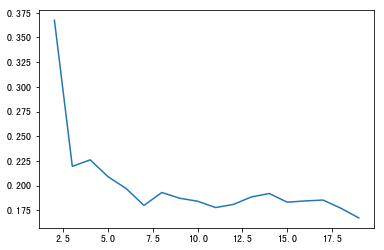

In [10]:
plt.plot(k,silhouette1)

In [11]:
kmeans = cluster.KMeans(n_clusters = 4).fit(train_table)
cluster_labels = kmeans.labels_

In [12]:
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 1, 1,
       2, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,

In [13]:
table['cluster']=cluster_labels

In [14]:
table_clu_1=table[table["cluster"]==1]
table_clu_2=table[table["cluster"]==2]
table_clu_3=table[table["cluster"]==3]
table_clu_4=table[table["cluster"]==4]
# table_clu_5=table[table["cluster"]==5]
# table_clu_6=table[table["cluster"]==6]
# table_clu_7=table[table["cluster"]==7]
# table_clu_8=table[table["cluster"]==8]
# table_clu_9=table[table["cluster"]==9]
# table_clu_10=table[table["cluster"]==10]


In [15]:
table_clu_3

,state_code,house_unitPrice,lease_unitPrice,center,center_lat,center_lon,cit,dist,vil,master,...,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike,cluster
0,552226718,717000.0,1017.75,"(24.97196447627833, 121.57556719359505)",24.971964,121.575567,台北市,文山區,老泉里,0.021583,...,40,4,2,12,0,0,1,1,1,3
1,552426755,517000.0,1017.75,"(24.981008193607902, 121.57059498487678)",24.981008,121.570595,台北市,文山區,老泉里,0.021583,...,46,9,3,29,1,3,1,2,2,3
2,552326738,341000.0,1017.75,"(24.976486334943115, 121.5786568323529)",24.976486,121.578657,台北市,文山區,指南里,0.139898,...,32,4,1,11,0,3,1,2,0,3
3,552326739,436000.0,1017.75,"(24.976486334943115, 121.5832037836341)",24.976486,121.583204,台北市,文山區,指南里,0.139898,...,25,2,0,6,0,1,1,1,0,3
4,552326740,406000.0,1017.75,"(24.976486334943115, 121.5877507349153)",24.976486,121.587751,台北市,文山區,指南里,0.139898,...,20,1,0,4,0,0,0,1,0,3
5,552326741,480000.0,1017.75,"(24.976486334943115, 121.5922976861965)",24.976486,121.592298,台北市,文山區,指南里,0.139898,...,10,1,0,3,0,0,0,1,0,3
6,552426756,399000.0,1017.75,"(24.981008193607902, 121.57513874578518)",24.981008,121.575139,台北市,文山區,指南里,0.139898,...,42,5,3,21,0,3,1,2,2,3
7,552426757,496000.0,937.00,"(24.981008193607902, 121.57968250669359)",24.981008,121.579683,台北市,文山區,指南里,0.139898,...,33,4,1,11,0,3,1,2,0,3
8,552426758,439500.0,1017.75,"(24.981008193607902, 121.58422626760199)",24.981008,121.584226,台北市,文山區,指南里,0.139898,...,22,1,0,6,0,2,1,1,0,3
9,552426759,427500.0,1017.75,"(24.981008193607902, 121.58877002851041)",24.981008,121.588770,台北市,文山區,指南里,0.139898,...,20,1,0,4,0,1,0,1,0,3


In [124]:
table_clu_1

,state_code,house_unitPrice,lease_unitPrice,center,center_lat,center_lon,cit,dist,vil,master,...,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike,cluster
0,552226718,717000.0,1017.75,"(24.97196447627833, 121.57556719359505)",24.971964,121.575567,台北市,文山區,老泉里,0.021583,...,40,4,2,12,0,0,1,1,1,1
1,552426755,517000.0,1017.75,"(24.981008193607902, 121.57059498487678)",24.981008,121.570595,台北市,文山區,老泉里,0.021583,...,46,9,3,29,1,3,1,2,2,1
2,552326738,341000.0,1017.75,"(24.976486334943115, 121.5786568323529)",24.976486,121.578657,台北市,文山區,指南里,0.139898,...,32,4,1,11,0,3,1,2,0,1
3,552326739,436000.0,1017.75,"(24.976486334943115, 121.5832037836341)",24.976486,121.583204,台北市,文山區,指南里,0.139898,...,25,2,0,6,0,1,1,1,0,1
4,552326740,406000.0,1017.75,"(24.976486334943115, 121.5877507349153)",24.976486,121.587751,台北市,文山區,指南里,0.139898,...,20,1,0,4,0,0,0,1,0,1
5,552326741,480000.0,1017.75,"(24.976486334943115, 121.5922976861965)",24.976486,121.592298,台北市,文山區,指南里,0.139898,...,10,1,0,3,0,0,0,1,0,1
6,552426756,399000.0,1017.75,"(24.981008193607902, 121.57513874578518)",24.981008,121.575139,台北市,文山區,指南里,0.139898,...,42,5,3,21,0,3,1,2,2,1
7,552426757,496000.0,937.00,"(24.981008193607902, 121.57968250669359)",24.981008,121.579683,台北市,文山區,指南里,0.139898,...,33,4,1,11,0,3,1,2,0,1
8,552426758,439500.0,1017.75,"(24.981008193607902, 121.58422626760199)",24.981008,121.584226,台北市,文山區,指南里,0.139898,...,22,1,0,6,0,2,1,1,0,1
9,552426759,427500.0,1017.75,"(24.981008193607902, 121.58877002851041)",24.981008,121.588770,台北市,文山區,指南里,0.139898,...,20,1,0,4,0,1,0,1,0,1


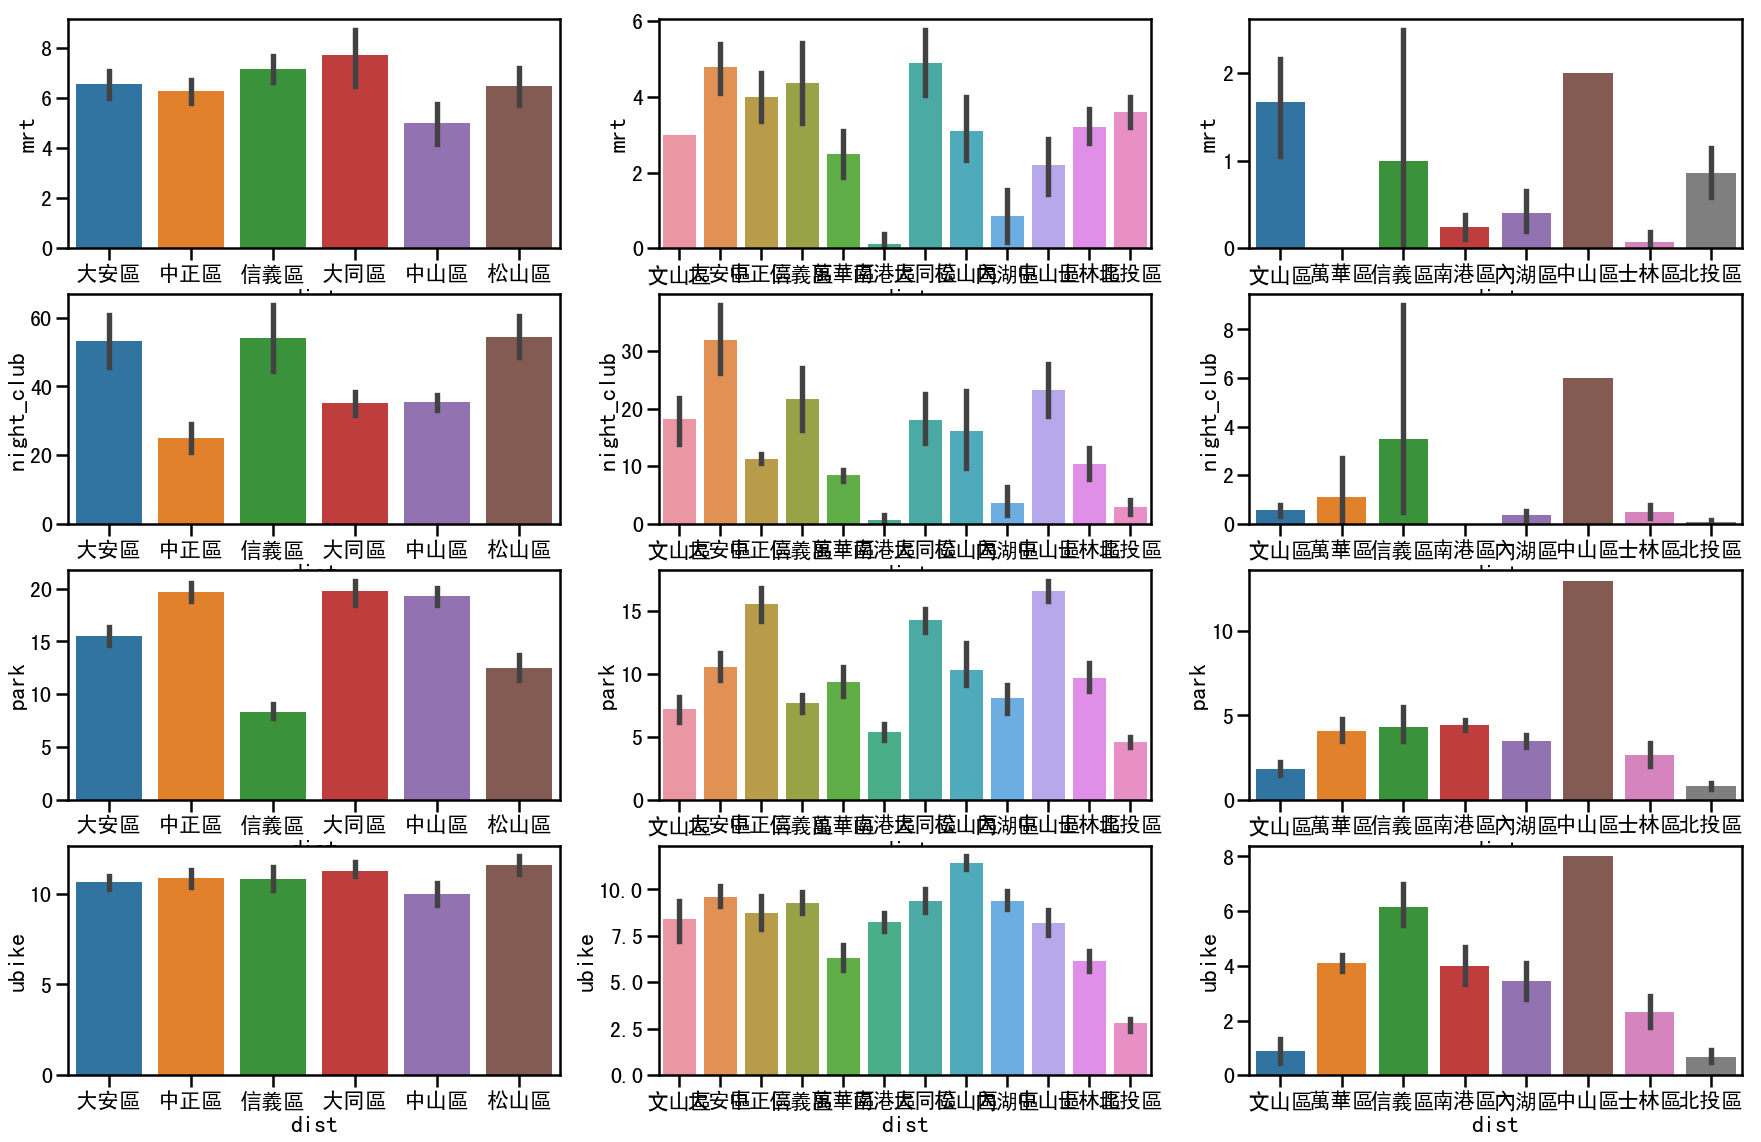

In [21]:
plt.figure(figsize=(30,60))
# plt.subplot(12,3,1)
# sns.barplot("dist","house_unitPrice",data=table_clu_1)
# plt.subplot(12,3,2)
# sns.barplot("dist","house_unitPrice",data=table_clu_2)
# plt.subplot(12,3,3)
# sns.barplot("dist","house_unitPrice",data=table_clu_3)
# plt.subplot(12,3,4)
# sns.barplot("dist","lease_unitPrice",data=table_clu_1)
# plt.subplot(12,3,5)
# sns.barplot("dist","lease_unitPrice",data=table_clu_2)
# plt.subplot(12,3,6)
# sns.barplot("dist","lease_unitPrice",data=table_clu_3)
# plt.subplot(12,3,7)
# sns.barplot("dist","master",data=table_clu_1)
# plt.subplot(12,3,8)
# sns.barplot("dist","master",data=table_clu_2)
# plt.subplot(12,3,9)
# sns.barplot("dist","master",data=table_clu_3)
# plt.subplot(12,3,10)
# sns.barplot("dist","college",data=table_clu_1)
# plt.subplot(12,3,11)
# sns.barplot("dist","college",data=table_clu_2)
# plt.subplot(12,3,12)
# sns.barplot("dist","college",data=table_clu_3)
# sns.set_context("poster")

# plt.subplot(12,3,1)
# sns.barplot("dist","highSchool",data=table_clu_1)
# plt.subplot(12,3,2)
# sns.barplot("dist","highSchool",data=table_clu_2)
# plt.subplot(12,3,3)
# sns.barplot("dist","highSchool",data=table_clu_3)
# plt.subplot(12,3,4)
# sns.barplot("dist","secondary",data=table_clu_1)
# plt.subplot(12,3,5)
# sns.barplot("dist","secondary",data=table_clu_2)
# plt.subplot(12,3,6)
# sns.barplot("dist","secondary",data=table_clu_3)
# plt.subplot(12,3,7)
# sns.barplot("dist","restaurant",data=table_clu_1)
# plt.subplot(12,3,8)
# sns.barplot("dist","restaurant",data=table_clu_2)
# plt.subplot(12,3,9)
# sns.barplot("dist","restaurant",data=table_clu_3)
# plt.subplot(12,3,10)
# sns.barplot("dist","106_traffic_done",data=table_clu_1)
# plt.subplot(12,3,11)
# sns.barplot("dist","106_traffic_done",data=table_clu_2)
# plt.subplot(12,3,12)
# sns.barplot("dist","106_traffic_done",data=table_clu_3)
# sns.set_context("poster")

# plt.subplot(12,3,25)
# sns.barplot("dist","cloth_done",data=table_clu_1)
# plt.subplot(12,3,26)
# sns.barplot("dist","cloth_done",data=table_clu_2)
# plt.subplot(12,3,27)
# sns.barplot("dist","cloth_done",data=table_clu_3)
# plt.subplot(12,3,28)
# sns.barplot("dist","convStore_done",data=table_clu_1)
# plt.subplot(12,3,29)
# sns.barplot("dist","convStore_done",data=table_clu_2)
# plt.subplot(12,3,30)
# sns.barplot("dist","convStore_done",data=table_clu_3)
# plt.subplot(12,3,31)
# sns.barplot("dist","edu_all_statecode",data=table_clu_1)
# plt.subplot(12,3,32)
# sns.barplot("dist","edu_all_statecode",data=table_clu_2)
# plt.subplot(12,3,33)
# sns.barplot("dist","edu_all_statecode",data=table_clu_3)
# plt.subplot(12,3,34)
# sns.barplot("dist","edu_all_statecode",data=table_clu_1)
# plt.subplot(12,3,35)
# sns.barplot("dist","edu_all_statecode",data=table_clu_2)
# plt.subplot(12,3,36)
# sns.barplot("dist","edu_all_statecode",data=table_clu_3)
# sns.set_context("poster")

# plt.subplot(12,3,1)
# sns.barplot("dist","hardware_done",data=table_clu_1)
# plt.subplot(12,3,2)
# sns.barplot("dist","hardware_done",data=table_clu_2)
# plt.subplot(12,3,3)
# sns.barplot("dist","hardware_done",data=table_clu_3)
# plt.subplot(12,3,4)
# sns.barplot("dist","hsp_and_clc",data=table_clu_1)
# plt.subplot(12,3,5)
# sns.barplot("dist","hsp_and_clc",data=table_clu_2)
# plt.subplot(12,3,6)
# sns.barplot("dist","hsp_and_clc",data=table_clu_3)
# plt.subplot(12,3,7)
# sns.barplot("dist","illegal_don",data=table_clu_1)
# plt.subplot(12,3,8)
# sns.barplot("dist","illegal_don",data=table_clu_2)
# plt.subplot(12,3,9)
# sns.barplot("dist","illegal_don",data=table_clu_3)
# plt.subplot(12,3,10)
# sns.barplot("dist","job_stat_code",data=table_clu_1)
# plt.subplot(12,3,11)
# sns.barplot("dist","job_stat_code",data=table_clu_2)
# plt.subplot(12,3,12)
# sns.barplot("dist","job_stat_code",data=table_clu_3)
# sns.set_context("poster")


plt.subplot(12,3,1)
sns.barplot("dist","mrt",data=table_clu_1)
plt.subplot(12,3,2)
sns.barplot("dist","mrt",data=table_clu_2)
plt.subplot(12,3,3)
sns.barplot("dist","mrt",data=table_clu_3)
plt.subplot(12,3,4)
sns.barplot("dist","night_club",data=table_clu_1)
plt.subplot(12,3,5)
sns.barplot("dist","night_club",data=table_clu_2)
plt.subplot(12,3,6)
sns.barplot("dist","night_club",data=table_clu_3)
plt.subplot(12,3,7)
sns.barplot("dist","park",data=table_clu_1)
plt.subplot(12,3,8)
sns.barplot("dist","park",data=table_clu_2)
plt.subplot(12,3,9)
sns.barplot("dist","park",data=table_clu_3)
plt.subplot(12,3,10)
sns.barplot("dist","ubike",data=table_clu_1)
plt.subplot(12,3,11)
sns.barplot("dist","ubike",data=table_clu_2)
plt.subplot(12,3,12)
sns.barplot("dist","ubike",data=table_clu_3)
sns.set_context("poster")


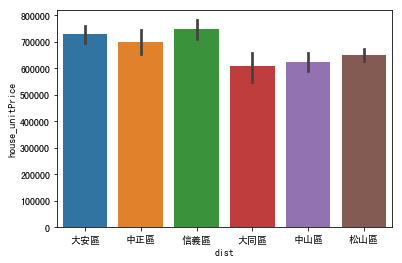

In [161]:
sns.barplot("dist","house_unitPrice",data=table_clu_2)

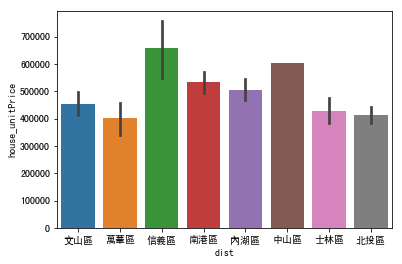

In [163]:
sns.barplot("dist","house_unitPrice",data=table_clu_3)

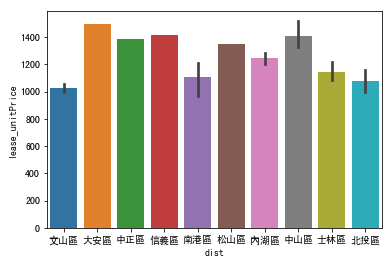

In [219]:
sns.barplot("dist","lease_unitPrice",data=table_clu_1)

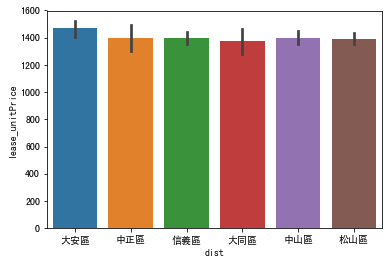

In [220]:
sns.barplot("dist","lease_unitPrice",data=table_clu_2)

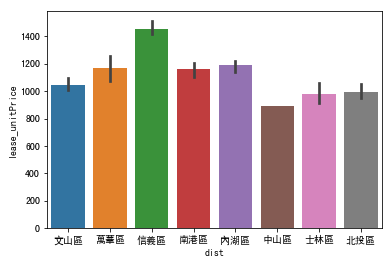

In [221]:
sns.barplot("dist","lease_unitPrice",data=table_clu_3)

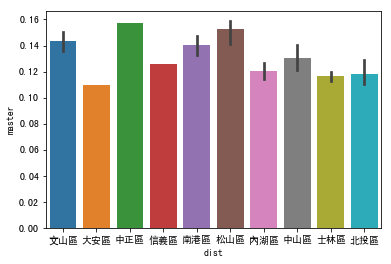

In [164]:
sns.barplot("dist","master",data=table_clu_1)

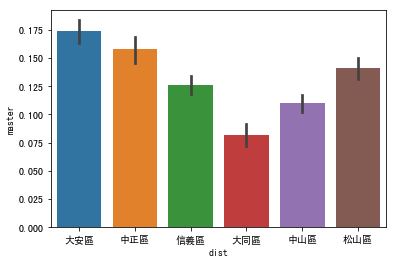

In [167]:
sns.barplot("dist","master",data=table_clu_2)

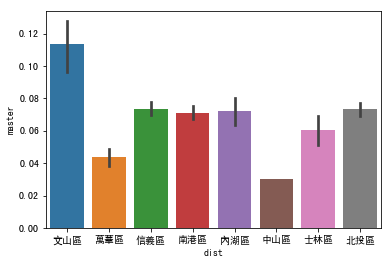

In [168]:
sns.barplot("dist","master",data=table_clu_3)

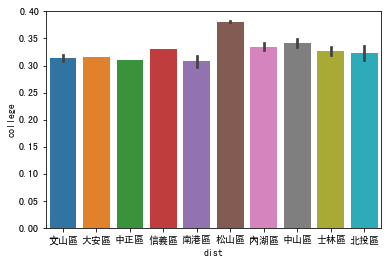

In [169]:
sns.barplot("dist","college",data=table_clu_1)

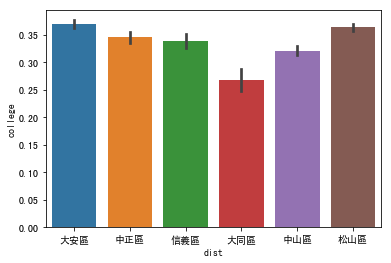

In [170]:
sns.barplot("dist","college",data=table_clu_2)

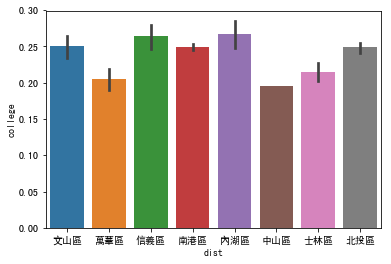

In [171]:
sns.barplot("dist","college",data=table_clu_3)

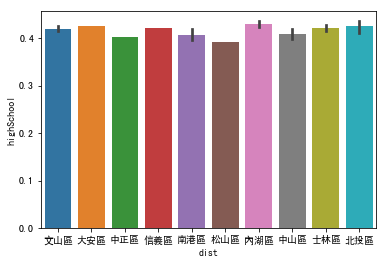

In [172]:
sns.barplot("dist","highSchool",data=table_clu_1)

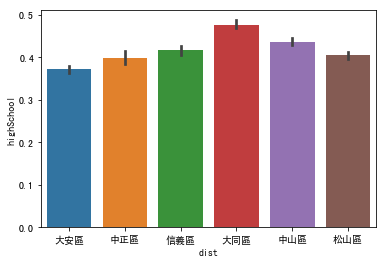

In [173]:
sns.barplot("dist","highSchool",data=table_clu_2)

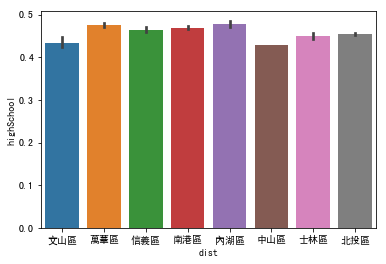

In [174]:
sns.barplot("dist","highSchool",data=table_clu_3)

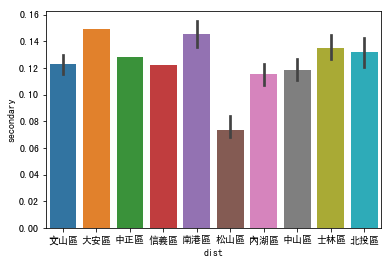

In [175]:
sns.barplot("dist","secondary",data=table_clu_1)

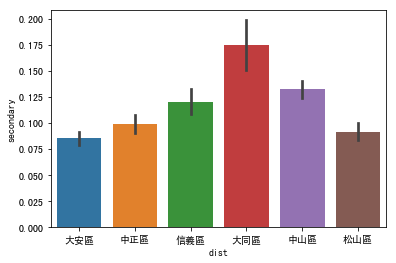

In [176]:
sns.barplot("dist","secondary",data=table_clu_2)

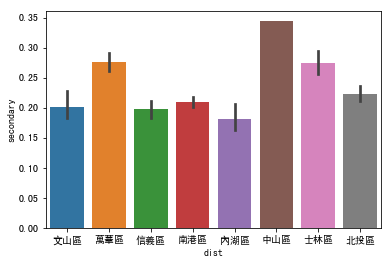

In [177]:
sns.barplot("dist","secondary",data=table_clu_3)

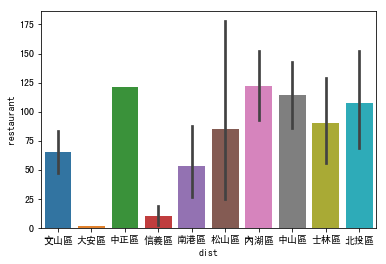

In [178]:
sns.barplot("dist","restaurant",data=table_clu_1)

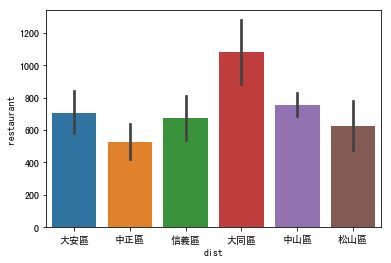

In [179]:
sns.barplot("dist","restaurant",data=table_clu_2)

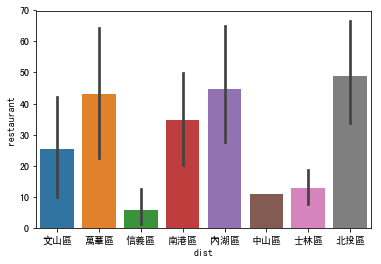

In [180]:
sns.barplot("dist","restaurant",data=table_clu_3)

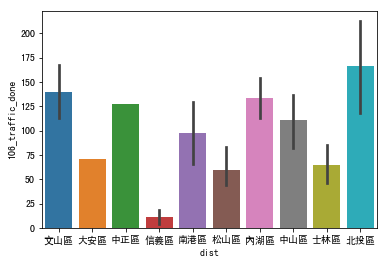

In [181]:
sns.barplot("dist","106_traffic_done",data=table_clu_1)

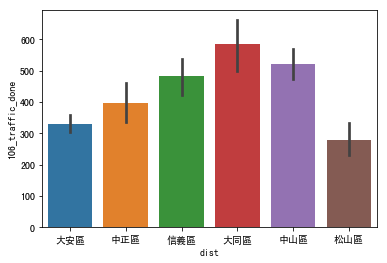

In [182]:
sns.barplot("dist","106_traffic_done",data=table_clu_2)

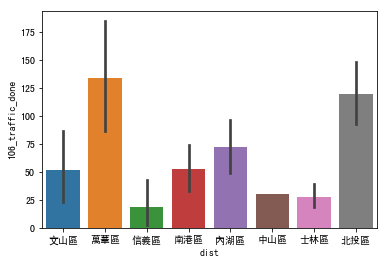

In [183]:
sns.barplot("dist","106_traffic_done",data=table_clu_3)

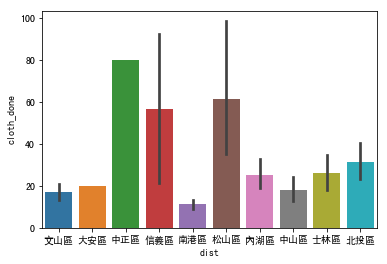

In [184]:
sns.barplot("dist","cloth_done",data=table_clu_1)

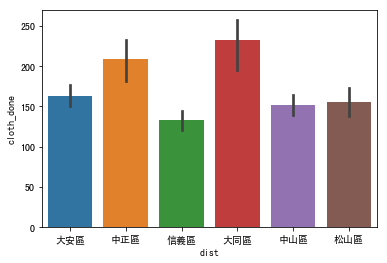

In [185]:
sns.barplot("dist","cloth_done",data=table_clu_2)

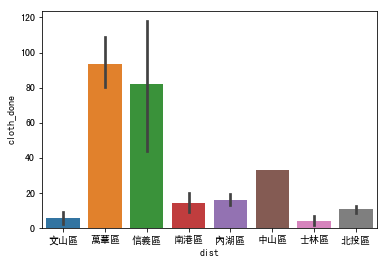

In [186]:
sns.barplot("dist","cloth_done",data=table_clu_3)

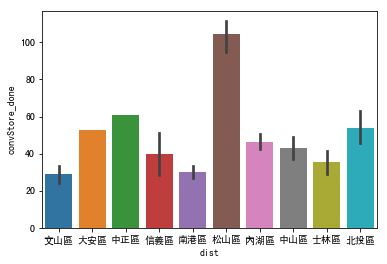

In [188]:
sns.barplot("dist","convStore_done",data=table_clu_1)

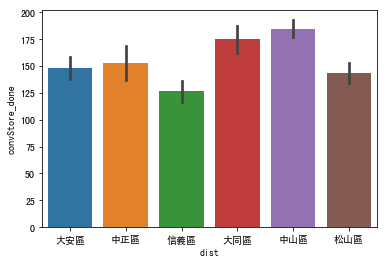

In [189]:
sns.barplot("dist","convStore_done",data=table_clu_2)

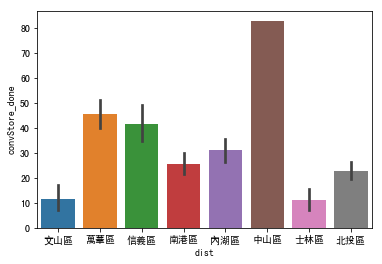

In [191]:
sns.barplot("dist","convStore_done",data=table_clu_3)

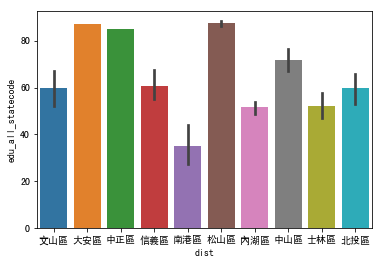

In [192]:
sns.barplot("dist","edu_all_statecode",data=table_clu_1)

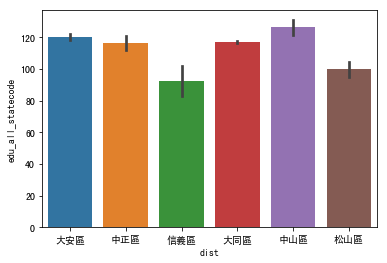

In [193]:
sns.barplot("dist","edu_all_statecode",data=table_clu_2)

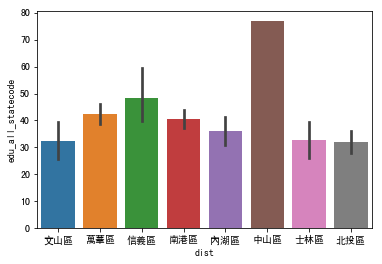

In [194]:
sns.barplot("dist","edu_all_statecode",data=table_clu_3)

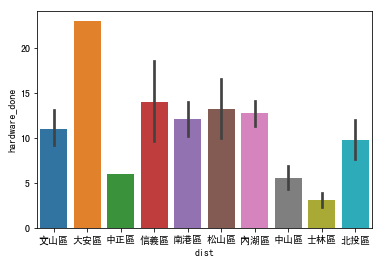

In [195]:
sns.barplot("dist","hardware_done",data=table_clu_1)

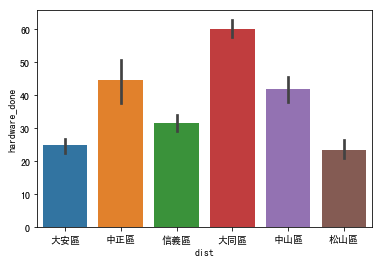

In [196]:
sns.barplot("dist","hardware_done",data=table_clu_2)

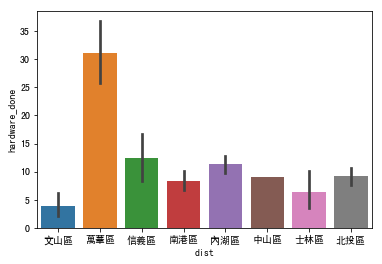

In [197]:
sns.barplot("dist","hardware_done",data=table_clu_3)

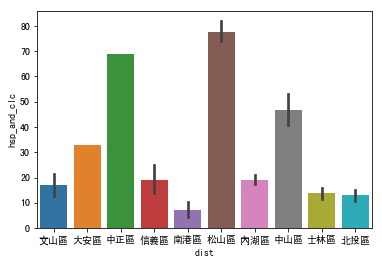

In [198]:
sns.barplot("dist","hsp_and_clc",data=table_clu_1)

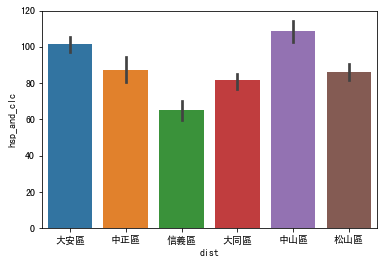

In [199]:
sns.barplot("dist","hsp_and_clc",data=table_clu_2)

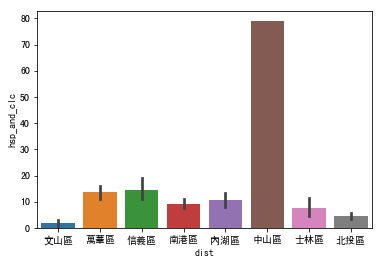

In [200]:
sns.barplot("dist","hsp_and_clc",data=table_clu_3)

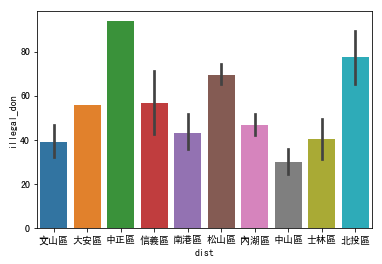

In [201]:
sns.barplot("dist","illegal_don",data=table_clu_1)

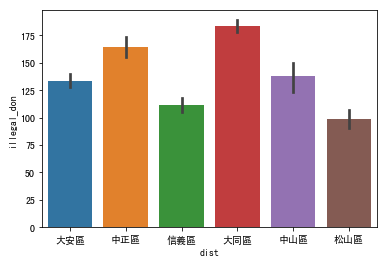

In [202]:
sns.barplot("dist","illegal_don",data=table_clu_2)

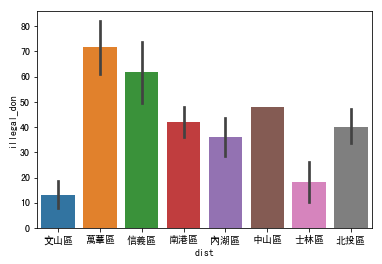

In [203]:
sns.barplot("dist","illegal_don",data=table_clu_3)

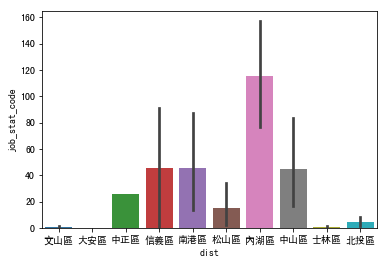

In [204]:
sns.barplot("dist","job_stat_code",data=table_clu_1)

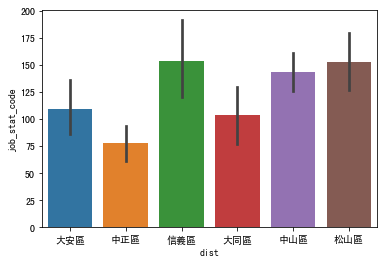

In [205]:
sns.barplot("dist","job_stat_code",data=table_clu_2)

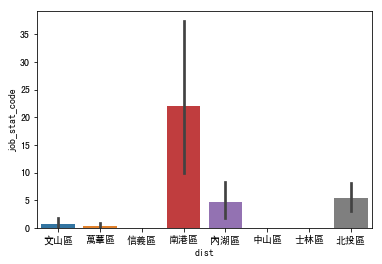

In [206]:
sns.barplot("dist","job_stat_code",data=table_clu_3)

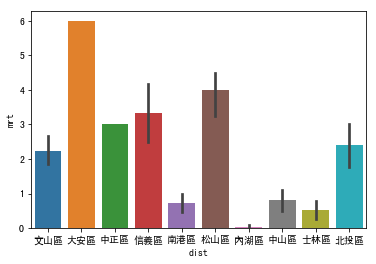

In [207]:
sns.barplot("dist","mrt",data=table_clu_1)

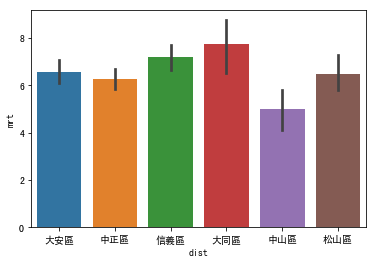

In [208]:
sns.barplot("dist","mrt",data=table_clu_2)

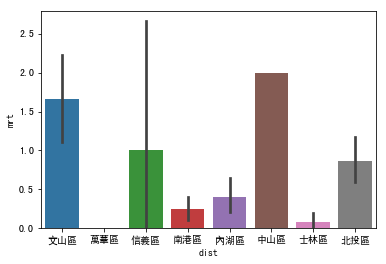

In [209]:
sns.barplot("dist","mrt",data=table_clu_3)

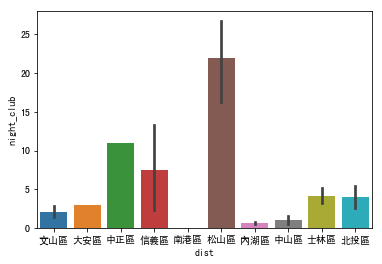

In [210]:
sns.barplot("dist","night_club",data=table_clu_1)

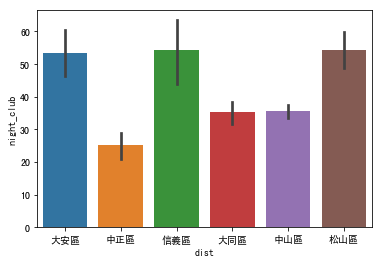

In [211]:
sns.barplot("dist","night_club",data=table_clu_2)

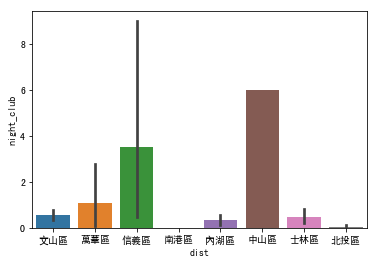

In [212]:
sns.barplot("dist","night_club",data=table_clu_3)

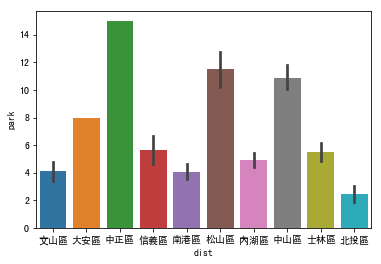

In [213]:
sns.barplot("dist","park",data=table_clu_1)

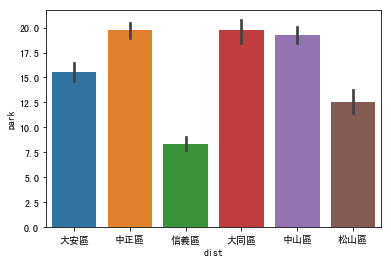

In [214]:
sns.barplot("dist","park",data=table_clu_2)

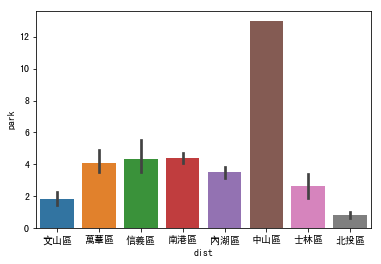

In [215]:
sns.barplot("dist","park",data=table_clu_3)

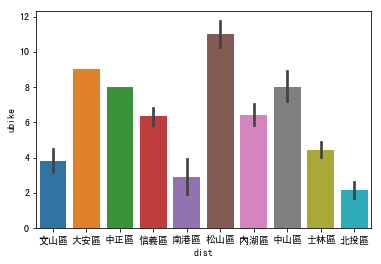

In [216]:
sns.barplot("dist","ubike",data=table_clu_1)

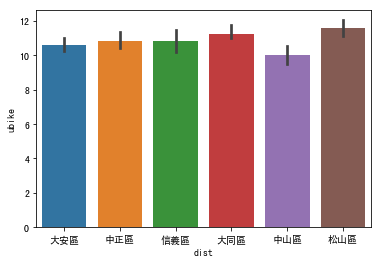

In [217]:
sns.barplot("dist","ubike",data=table_clu_2)

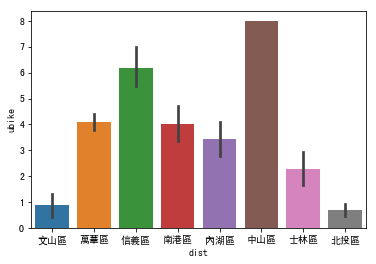

In [218]:
sns.barplot("dist","ubike",data=table_clu_3)

In [ ]:
sns.barplot("dist","ubike",data=table_clu_3)

# 階層式分群

In [19]:
from sklearn import cluster

In [88]:
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 12)

In [89]:
hclust.fit(train_table)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=12,
            pooling_func=<function mean at 0x0D133ED0>)

In [90]:
cluster_labels = hclust.labels_

In [91]:
cluster_labels

array([ 0,  0,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  3,  3,  7,  3,  3,  3,  3,  3,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  7,  7,  7,  3,  7,  7,  7,  7,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3, 11, 11, 11,  1,  1,  1,  1,  1,  1,  3, 11,
        1,  1,  0,  0, 11, 11,  5,  5, 11,  3,  3,  3,  3,  3,  3,  3,  3,
       11, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  0,
        4,  4,  4, 11, 11,  5,  5,  5,  5,  5,  2,  2, 11, 11,  2,  0,  0,
        4,  4,  4, 11, 11,  5,  5,  5,  5,  2,  2,  2, 11,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  4,  4, 11,  5,  5,  5,  5,  5,  5,  5,  5,  2,
        2,  2,  2,  2, 11, 11,  1,  1,  1,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  2,  2,  2,  2,  2,  2, 11,  1,  1,  1,  8,  8,
        8,  8,  8,  1,  8

In [74]:
silhouette_avg = metrics.silhouette_score(train_table, cluster_labels)

In [75]:
silhouette_avg

0.14531331634371553

In [59]:
silhouette2= []
k=range(2,20)
for i in k:
    hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = i)
    hclust.fit(train_table)
    cluster_labels = hclust.labels_
    silhouette2.append(metrics.silhouette_score(train_table, cluster_labels))

In [60]:
silhouette2

[0.38804639835126986,
 0.2039758088182536,
 0.18064032684253395,
 0.17929235015052314,
 0.16656822542987668,
 0.1809492140417652,
 0.1644743963530543,
 0.1407633897987393,
 0.14531331634371553,
 0.1481613648932445,
 0.15322887210363603,
 0.15445542332299694,
 0.1584784646184472,
 0.163003176560718,
 0.16480243304984882,
 0.15888494119580202,
 0.15312896962387976,
 0.15195708493725796]

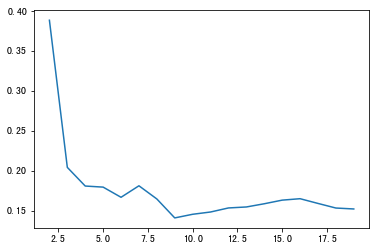

In [61]:
plt.plot(k,silhouette2)

# DBSCAN

In [6]:
import sklearn.cluster as skc

In [68]:
model = skc.DBSCAN(eps=3, min_samples=70)

In [69]:
model.fit(train_table)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=70, n_jobs=1, p=None)

In [70]:
cluster_label=model.labels_

In [71]:
cluster_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [72]:
silhouette=metrics.silhouette_score(train_table, cluster_label)

In [73]:
silhouette

0.3287929574616349

# groudby_cluster

In [28]:
table.groupby('cluster').median()

,state_code,house_unitPrice,lease_unitPrice,center_lat,center_lon,master,college,highSchool,secondary,median,...,convStore_done,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike
cluster,,,,,,,,,,,,,,,,,,,,,
0,554527021,495000.0,1136.0,25.075967,121.561437,0.125797,0.326646,0.420833,0.124591,778,...,39,59,9,16,43,1,1,1,4,5
1,553726948,683000.0,1414.0,25.039792,121.540857,0.139555,0.356769,0.403065,0.097551,800,...,155,116,30,90,130,117,6,40,16,11
2,554126977,555000.0,1333.0,25.057880,121.529859,0.087308,0.278102,0.456227,0.179067,662,...,86,89,30,52,106,12,3,11,10,8
3,554927032,455000.0,1083.0,25.094055,121.548623,0.074539,0.249828,0.461459,0.210083,627,...,22,34,8,6,33,0,0,0,2,2


# PCA主成分分析

In [83]:
from sklearn.decomposition import PCA

In [84]:
cl_table.keys()

Index(['house_unitPrice', 'lease_unitPrice', 'master', 'college', 'highSchool',
       'secondary', 'median', 'restaurant', '106_traffic_done', 'cloth_done',
       'convStore_done', 'edu_all_statecode', 'hardware_done', 'hsp_and_clc',
       'illegal_don', 'job_stat_code', 'mrt', 'night_club', 'park', 'ubike'],
      dtype='object')

In [85]:
train_table=preprocessing.scale(cl_table)#在座PCA之前要先坐姿要正規化

In [84]:
train_table[1:100]

array([[-0.19093725, -0.7965708 , -2.11649266, ..., -0.57413842,
        -0.94217481, -1.03061354],
       [-1.27887315, -0.7965708 ,  0.81879658, ..., -0.57413842,
        -0.94217481, -1.55753232],
       [-0.69163502, -0.7965708 ,  0.81879658, ..., -0.57413842,
        -1.11608385, -1.55753232],
       ...,
       [ 0.62501467,  1.17590232,  1.82648978, ...,  0.37395494,
         0.97082457,  0.81360219],
       [ 0.54156504,  1.17590232,  1.82648978, ...,  0.84800161,
         0.6230065 ,  1.07706158],
       [ 1.83348892,  1.17590232,  1.82648978, ...,  1.32204829,
         1.1447336 ,  0.81360219]])

In [86]:
pca=PCA(n_components=7)

In [87]:
pc=pca.fit(train_table)

In [88]:
print(pc.explained_variance_ratio_)

[0.52726288 0.18902539 0.04744185 0.04624326 0.03708915 0.03279626
 0.02629103]


In [89]:
pc.explained_variance_

array([10.56051845,  3.78597891,  0.95021013,  0.92620361,  0.74285654,
        0.6568745 ,  0.52658154])

In [145]:
pca_table=pca_train_table.components_

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

In [90]:
pca_train_table=pca.fit_transform(train_table)

In [91]:
pca_train_table

array([[-4.48072411, -3.01923679,  0.94549029, ...,  1.63571331,
         0.52841856, -0.55142393],
       [-3.71410345, -3.38894949, -0.05426898, ...,  1.44787182,
        -0.11495944,  0.09516677],
       [-3.24892945,  1.21852723, -0.73013607, ...,  1.00545897,
        -0.40006696,  0.54877109],
       ...,
       [ 1.74172051,  2.90436359,  2.71434924, ..., -1.51996634,
        -0.76775312,  1.84847431],
       [-5.24543871, -2.78586358, -0.24663502, ...,  1.65202871,
        -0.42945915, -0.77115789],
       [-5.45532046, -2.2316029 , -0.63254608, ...,  2.0326251 ,
        -0.14825366, -0.8831319 ]])

In [148]:
silhouette_pca= []
k=range(2,20)
for i in k:
    kmean = cluster.KMeans(n_clusters = i).fit(pca_train_table)
    cluster_labels = kmean.labels_
    silhouette_avg = metrics.silhouette_score(pca_train_table,cluster_labels)
    silhouette_pca.append(silhouette_avg)
    


In [149]:
silhouette_pca

[0.6376855815378657,
 0.585488637045577,
 0.5374419813935299,
 0.5505733872516427,
 0.5449969184021892,
 0.5450865114066233,
 0.5403927031842938,
 0.5273693656516398,
 0.5297828948605782,
 0.5401644046435933,
 0.5429259127328276,
 0.5377921886055196,
 0.5366554483236886,
 0.5416650459277772,
 0.5398989122791804,
 0.5361873937196654,
 0.5373218128860052,
 0.5421466021335023]

In [116]:
kmean = cluster.KMeans(n_clusters = 8).fit(pca_train_table)
cluster_labels = kmean.labels_

In [117]:
cluster_labels

array([6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 6, 0, 3, 3, 4, 4,
       3, 3, 7, 0, 7, 7, 3, 3, 7, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 0, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 2, 4, 0, 3, 2, 6, 0, 0,
       0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 2, 3, 0, 6, 0, 0, 0, 6, 6, 6, 6, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 3, 3, 7, 0, 7, 0, 0,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 3, 5, 6, 0, 6,
       7, 6, 6, 6, 7, 6, 6, 6, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 3, 0, 0, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 0, 0, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 7, 0, 2, 0, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 0,

In [118]:
table["clu"]=cluster_labels

In [158]:
table.groupby("clu").median()

,state_code,house_unitPrice,lease_unitPrice,center_lat,center_lon,master,college,highSchool,secondary,median,...,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike,cluster
clu,,,,,,,,,,,,,,,,,,,,,
0,554327015.0,495000.0,1187.000,25.066924,121.565028,0.115704,0.305199,0.442465,0.137461,739.0,...,58.0,13.0,16.0,49.0,1.0,0.0,1.0,4.0,5.0,0
1,553926970.0,640000.0,1348.000,25.048836,121.534362,0.114508,0.324915,0.428145,0.132598,715.0,...,105.0,33.0,78.0,122.0,76.0,5.0,30.0,14.0,10.0,1
2,555677065.0,393500.0,943.750,25.127969,121.531355,0.043779,0.185259,0.439672,0.318061,570.5,...,17.0,0.0,1.0,5.5,0.0,0.0,0.0,1.0,1.0,3
3,553826949.5,742000.0,1500.000,25.044314,121.540495,0.152630,0.359671,0.393334,0.096770,832.5,...,121.5,34.5,101.0,149.5,128.5,7.0,47.0,18.5,11.0,1
4,554377007.0,544750.0,1275.000,25.069184,121.553249,0.101853,0.317988,0.441606,0.141556,718.0,...,77.0,23.0,42.0,92.5,10.0,2.0,8.0,9.0,9.0,2
5,554527029.0,462000.0,1083.000,25.075967,121.575139,0.094610,0.287507,0.451779,0.161262,694.0,...,41.0,8.0,8.0,37.0,0.0,0.0,0.0,3.0,3.0,3
6,553726947.0,683000.0,1414.000,25.039792,121.536340,0.134858,0.354286,0.411948,0.097551,770.0,...,118.0,31.0,92.0,134.0,120.0,6.0,38.0,17.0,11.0,1
7,555027058.0,437000.0,1017.750,25.098577,121.554966,0.078630,0.249828,0.461074,0.210083,627.0,...,27.0,4.0,2.0,16.0,0.0,0.0,0.0,2.0,1.0,3
8,553876966.5,603750.0,1380.625,25.046575,121.538730,0.101314,0.290244,0.447772,0.165112,694.0,...,97.5,30.5,67.5,108.5,13.5,4.0,19.0,12.0,9.0,2


In [119]:
table["above_college"]=table["college"]+table["master"]*100

In [120]:
table_clu=table[["state_code","house_unitPrice","lease_unitPrice","center_lat","center_lon","dist","vil","above_college","median","restaurant","106_traffic_done","cloth_done","edu_all_statecode","hardware_done","hsp_and_clc","illegal_don","job_stat_code","mrt","night_club","park","ubike","clu"]]

In [124]:
table_clu.head()

,state_code,house_unitPrice,lease_unitPrice,center_lat,center_lon,dist,vil,above_college,median,restaurant,...,edu_all_statecode,hardware_done,hsp_and_clc,illegal_don,job_stat_code,mrt,night_club,park,ubike,clu
0,552226718,717000.0,1017.75,24.971964,121.575567,文山區,老泉里,2.318945,538,1,...,40,4,2,12,0,0,1,1,1,6
1,552426755,517000.0,1017.75,24.981008,121.570595,文山區,老泉里,2.318945,538,61,...,46,9,3,29,1,3,1,2,2,6
2,552326738,341000.0,1017.75,24.976486,121.578657,文山區,指南里,14.240352,750,4,...,32,4,1,11,0,3,1,2,0,7
3,552326739,436000.0,1017.75,24.976486,121.583204,文山區,指南里,14.240352,750,3,...,25,2,0,6,0,1,1,1,0,7
4,552326740,406000.0,1017.75,24.976486,121.587751,文山區,指南里,14.240352,750,7,...,20,1,0,4,0,0,0,1,0,7


In [123]:
table_clu.to_csv("C:/Users/Big data/Desktop/cluster_table8.csv",index=False,encoding="utf-8-sig")